# MBL Data Analysis Notebook

Here is where all code for MBL will live

### Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.optimize import curve_fit

from IPython.display import Image

# Week 2: UV-Vis Absorbance

__Data Files__

V3 + :

1: Native pH 7 blank

2: Denatured pH 7 blank

3: Native Protein (pH 7)

4: Denatured Protein (pH 7)

5: Native mQ blank

6: Denatured mQ blank

7: Native Protein (mQ)

8: Denatured Protein (mQ)

In [3]:
d1 = pd.read_csv('Data/w2/V31.csv',skiprows=1,index_col=0)
d2 = pd.read_csv('Data/w2/V3_2.csv',skiprows=1,index_col=0)
d3 = pd.read_csv('Data/w2/V3_3_.csv',skiprows=1,index_col=0)
d4 = pd.read_csv('Data/w2/V3_4.csv',skiprows=1,index_col=0)
d5 = pd.read_csv('Data/w2/V3_5.csv',skiprows=1,index_col=0)
d6 = pd.read_csv('Data/w2/V3_6.csv',skiprows=1,index_col=0)
d7 = pd.read_csv('Data/w2/V3_7_.csv',skiprows=1,index_col=0)
d8 = pd.read_csv('Data/w2/V3_8.csv',skiprows=1,index_col=0)

In [4]:
native7 = d3.values-d1.values
den7 = d4.values-d2.values
nativemQ = d7.values-d5.values
denmQ = d8.values-d6.values

df = pd.DataFrame()
df['Native (pH 7)'] = native7[:,0]
df['Denatured (pH 7)'] = den7[:,0]
df['Native (mQ)'] = nativemQ[:,0]
df['Denatured (mQ)'] = denmQ[:,0]

df.index = d1.index

Text(0.5, 1.0, 'Protein Absorption Profiles (mQ)')

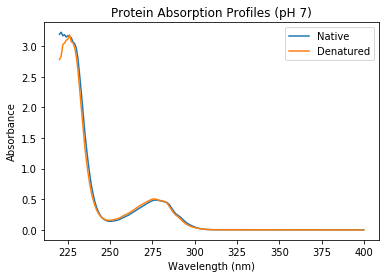

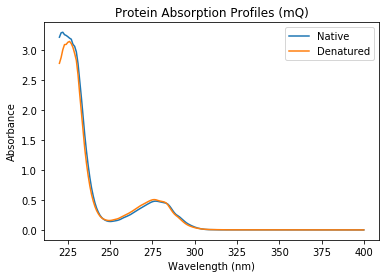

In [5]:
plt.figure(1)
plt.plot(df.index,df['Native (pH 7)'], label='Native')
plt.plot(df.index,df['Denatured (pH 7)'], label='Denatured')
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Protein Absorption Profiles (pH 7)')

plt.figure(2)
plt.plot(df.index,df['Native (mQ)'], label='Native')
plt.plot(df.index,df['Denatured (mQ)'], label='Denatured')
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Protein Absorption Profiles (mQ)')

#### Raw Data

###### Blanks

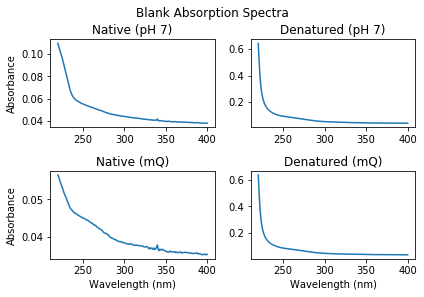

In [6]:
plt.suptitle('Blank Absorption Spectra',y=1.02)

plt.subplot(2,2,1)
plt.plot(d1.index,d1.values)
plt.ylabel('Absorbance')
plt.title('Native (pH 7)')

plt.subplot(2,2,2)
plt.plot(d2.index,d2.values)
plt.title('Denatured (pH 7)')



plt.subplot(2,2,3)
plt.plot(d5.index,d5.values)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Native (mQ)')

plt.subplot(2,2,4)
plt.plot(d6.index,d6.values)
plt.xlabel('Wavelength (nm)')
plt.title('Denatured (mQ)')

plt.tight_layout()

###### Raw

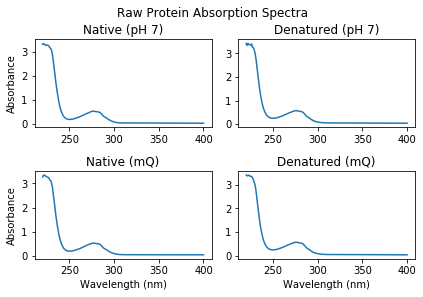

In [7]:
plt.suptitle('Raw Protein Absorption Spectra',y=1.02)

plt.subplot(2,2,1)
plt.plot(d3.index,d3.values)
plt.ylabel('Absorbance')
plt.title('Native (pH 7)')

plt.subplot(2,2,2)
plt.plot(d4.index,d4.values)
plt.title('Denatured (pH 7)')



plt.subplot(2,2,3)
plt.plot(d7.index,d7.values)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Native (mQ)')

plt.subplot(2,2,4)
plt.plot(d8.index,d8.values)
plt.xlabel('Wavelength (nm)')
plt.title('Denatured (mQ)')

plt.tight_layout()

# Week 3: Fluorescence

#### Data Files

In [9]:
#blanks
gdnblank280 = pd.read_table('Data/w3/200212-gdnblank-FL-EM-Ex280.txt',skiprows=[1,2],index_col=0)
gdnblank295 = pd.read_table('Data/w3/200212-gdnblank-FL-EM-Ex295.txt',skiprows=[1,2],index_col=0)
mQblank280 = pd.read_table('Data/w3/200212-mQblank-FL-EM-Ex280.txt',skiprows=[1,2],index_col=0)
mQblank295 = pd.read_table('Data/w3/200212-mQblank-FL-EM-Ex295.txt',skiprows=[1,2],index_col=0)

#protein emission spectra
v3gdn280 = pd.read_table('Data/w3/200212-v3-FL-EM-gdn-Ex280.txt',skiprows=[1,2],index_col=0)
v3gdn295 = pd.read_table('Data/w3/200212-v3-FL-EM-gdn-Ex295.txt',skiprows=[1,2],index_col=0)
v3mQ280 = pd.read_table('Data/w3/200212-v3-FL-EM-mQ-Ex280.txt',skiprows=[1,2],index_col=0)
v3mQ295 = pd.read_table('Data/w3/200212-v3-FL-EM-mQ-Ex295.txt',skiprows=[1,2],index_col=0)

###controls
#indole (gdn295 had error in copying)
indogdn280 = pd.read_table('Data/w3/200212-indole-FL-EM-gdn-Ex280.txt',skiprows=[1],index_col=0)
#indogdn295 = pd.read_table('Data/w3/200212-indole-FL-EM-gdn-Ex295.txt',skiprows=[1,2],index_col=0)
indomQ280 = pd.read_table('Data/w3/200212-indole-FL-EM-mQ-Ex280.txt',skiprows=[1,2],index_col=0)

#n100p280 (the three below had errors in copying)
##npgdn280 = pd.read_table('Data/w3/200212-n100p280-FL-EM-gdn-Ex280.txt',skiprows=[1,2],index_col=0)
##npgdn295 = pd.read_table('Data/w3/200212-n100p280-FL-EM-gdn-Ex295.txt',skiprows=[1,2],index_col=0)
#npmQ280 = pd.read_table('Data/w3/200212-n100p280-FL-EM-mQ-Ex280.txt',skiprows=[1,2],index_col=0)
npmQ295 = pd.read_table('Data/w3/200212-n100p280-FL-EM-mQ-Ex295.txt',skiprows=[1,2],index_col=0)

#### Blanking

In [10]:
v3gdn280_b = v3gdn280 - gdnblank280
v3gdn295_b = v3gdn295 - gdnblank295
v3mQ280_b = v3mQ280 - mQblank280
v3mQ295_b = v3mQ295 - mQblank295

indogdn280_b = indogdn280 - gdnblank280
#indogdn295_b = indogdn295 - gdnblank295
indomQ280_b = indomQ280 - mQblank280

npmQ295_b = npmQ295 - mQblank295

In [11]:
print('V3gdn280 Wavelength: ',v3gdn280_b.idxmax().values[0],'nm, Intensity: ',v3gdn280_b.max().values[0])
print('V3gdn295 Wavelength: ',v3gdn295_b.idxmax().values[0],'nm, Intensity: ',v3gdn295_b.max().values[0])
print('V3mQ280 Wavelength: ',v3mQ280_b.idxmax().values[0],'nm, Intensity: ',v3mQ280_b.max().values[0])
print('V3mQ295 Wavelength: ',v3mQ295_b.idxmax().values[0],'nm, Intensity: ',v3mQ295_b.max().values[0])
print('indolegdn280 Wavelength: ',indogdn280_b.idxmax().values[0],'nm, Intensity: ',indogdn280_b.max().values[0])
print('indolemQ280 Wavelength: ',indomQ280_b.idxmax().values[0],'nm, Intensity: ',indomQ280_b.max().values[0])
print('n100p280mQ295 Wavelength: ',npmQ295_b.idxmax().values[0],'nm, Intensity: ',npmQ295_b.max().values[0])

V3gdn280 Wavelength:  355 nm, Intensity:  387245.1611899999
V3gdn295 Wavelength:  365 nm, Intensity:  151728.99323000002
V3mQ280 Wavelength:  335 nm, Intensity:  1495617.80825
V3mQ295 Wavelength:  340 nm, Intensity:  599584.53826
indolegdn280 Wavelength:  365 nm, Intensity:  3470429.4438624303
indolemQ280 Wavelength:  365 nm, Intensity:  888242.3990300001
n100p280mQ295 Wavelength:  350 nm, Intensity:  242957.61585


#### Plotting

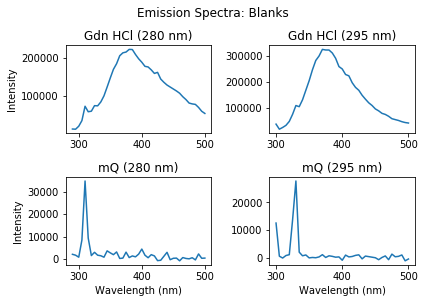

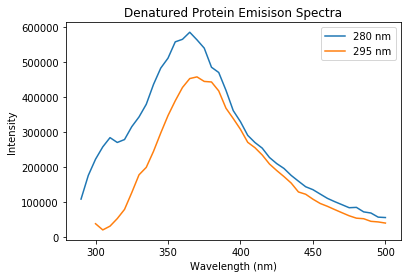

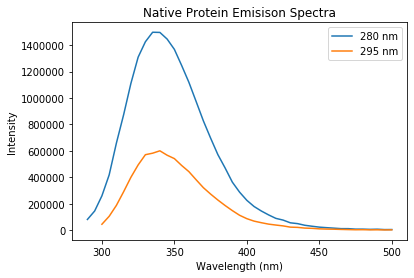

In [12]:
plt.figure(1)

plt.suptitle('Emission Spectra: Blanks',y=1.04)

plt.subplot(2,2,1)
plt.plot(gdnblank280)
plt.title('Gdn HCl (280 nm)')
plt.ylabel('Intensity')

plt.subplot(2,2,2)
plt.plot(gdnblank295)
plt.title('Gdn HCl (295 nm)')

plt.subplot(2,2,3)
plt.plot(mQblank280)
plt.title('mQ (280 nm)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

plt.subplot(2,2,4)
plt.plot(mQblank295)
plt.title('mQ (295 nm)')
plt.xlabel('Wavelength (nm)')

plt.tight_layout()

#Denatured
plt.figure(3)
plt.plot(v3gdn280,label='280 nm')
plt.plot(v3gdn295,label='295 nm')
plt.title('Denatured Protein Emisison Spectra')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()


#Native
plt.figure(4)
plt.plot(v3mQ280,label='280 nm')
plt.plot(v3mQ295,label='295 nm')
plt.title('Native Protein Emisison Spectra')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()

# Week 4: 3D Fluorescence

#### Data Files

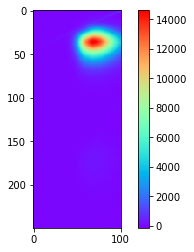

In [118]:
dfv3_ = pd.read_table('Data/w4/FRI-Dual2-mQv3-A280-0.0722-3DFL.txt',skiprows=[1,2],index_col=0)
dfwt_ = pd.read_table('Data/w4/FRI-Dual2-mQwt-A280-0.04852-3DFL.txt',skiprows=[1,2],index_col=0)
dfDPHS_ = pd.read_table('Data/w4/FRI-Dual2-mQDPHS-A280-0.1034-3DFL.txt',skiprows=[1,2],index_col=0)
dfind_ = pd.read_table('Data/w4/FRI-Dual2-mQind-A280-0.06731-3DFL.txt',skiprows=[1,2],index_col=0)
plt.imshow(dfv3_.values, cmap='rainbow')
plt.colorbar()

This is the raw data for v3 - let's get it to the right place

#### Fixing orientations (note that axes are wrong here, due to plt.imshow properties. Fixed below)

In [1]:
dfv3 = pd.DataFrame(np.flip(dfv3_.values), columns=dfv3_.columns[::-1], index=dfv3_.index[::-1])
dfwt = pd.DataFrame(np.flip(dfwt_.values), columns=dfwt_.columns[::-1], index=dfwt_.index[::-1])
dfDPHS = pd.DataFrame(np.flip(dfDPHS_.values), columns=dfDPHS_.columns[::-1], index=dfDPHS_.index[::-1])
dfind = pd.DataFrame(np.flip(dfind_.values), columns=dfind_.columns[::-1], index=dfind_.index[::-1])

NameError: name 'pd' is not defined

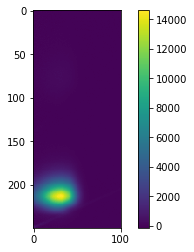

In [82]:
plt.imshow(dfv3)
plt.colorbar()

#### Correcting for Differences in Absorbance

In [83]:
Av3 = 0.0722
Awt = 0.04852
ADPHS = 0.1034
Aind = 0.06731

#normalizing them all to absorbance of 1 - this may be wrong
dfv3 /= Av3
dfwt /= Awt
dfDPHS /= ADPHS
dfind /= Aind

These are now the "max intensities" all on the same scale, normalized by the measured absorbance values

In [84]:
print(dfv3.max().max())
print(dfwt.max().max())
print(dfind.max().max())
print(dfDPHS.max().max())

202179.6099722992
212038.5486397362
228359.38196404697
176411.74100580267


#### Normalizing

To normalize to wildtype, divide each dataset by the max value of wt - this will give max intensity of 1 for wildtype, then lower values for DPHS, as expected.

In [85]:
wt_norm = dfwt.max().max()

dfwt /= wt_norm
dfv3 /= wt_norm
dfDPHS /= wt_norm
dfind /= wt_norm

These are the normalized max intensity values

In [86]:
print('Wt: ', dfwt.max().max())
print('v3: ', dfv3.max().max())
print('D+PHS: ', dfDPHS.max().max())
print('Indole: ', dfind.max().max())

Wt:  1.0
v3:  0.9535040268352911
D+PHS:  0.8319795722877484
Indole:  1.0769710669546255


So Delta PHS has ~17% lower absorbance than wildtype and v3 is between the two. Interestingly, indole is 7% higher than wildtype, perhaps because energy isn't lost to the surrounding protein

#### Plotting

Text(0.5, 1.0, 'Fluorescence Spectrum of Indole')

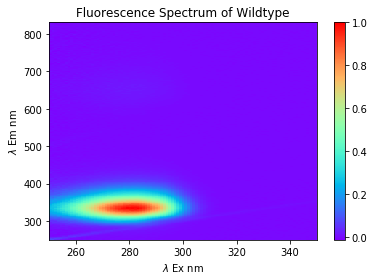

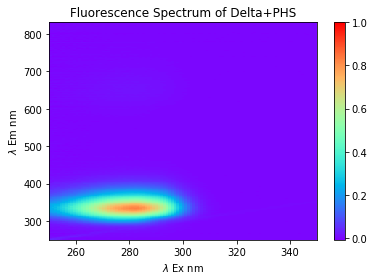

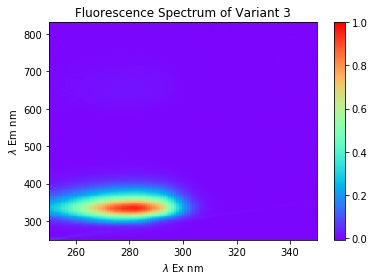

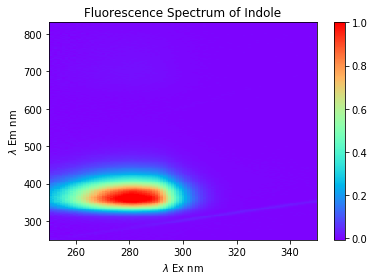

In [117]:
plt.figure(1)
plt.imshow(dfwt.values, aspect='auto', cmap='rainbow', extent=[int(min(dfwt.columns)),int(max(dfwt.columns)),min(dfwt.index),max(dfwt.index)])
plt.colorbar()
plt.xlabel('$\lambda$ Ex nm')
plt.ylabel('$\lambda$ Em nm')
plt.title('Fluorescence Spectrum of Wildtype')

plt.figure(2)
plt.imshow(dfDPHS.values, vmax=1, aspect='auto', cmap='rainbow', extent=[int(min(dfDPHS.columns)),int(max(dfDPHS.columns)),min(dfDPHS.index),max(dfDPHS.index)])
plt.colorbar()
plt.xlabel('$\lambda$ Ex nm')
plt.ylabel('$\lambda$ Em nm')
plt.title('Fluorescence Spectrum of Delta+PHS')

plt.figure(3)
plt.imshow(dfv3.values, vmax=1, aspect='auto', cmap='rainbow', extent=[int(min(dfv3.columns)),int(max(dfv3.columns)),min(dfv3.index),max(dfv3.index)])
plt.colorbar()
plt.xlabel('$\lambda$ Ex nm')
plt.ylabel('$\lambda$ Em nm')
plt.title('Fluorescence Spectrum of Variant 3')

plt.figure(4)
plt.imshow(dfind.values, vmax=1, aspect='auto', cmap='rainbow', extent=[int(min(dfind.columns)),int(max(dfind.columns)),min(dfind.index),max(dfind.index)])
plt.colorbar()
plt.xlabel('$\lambda$ Ex nm')
plt.ylabel('$\lambda$ Em nm')
plt.title('Fluorescence Spectrum of Indole')


Note that indole is saturated here, because max values are higher than 1

# Week 5: Circular Dichroism

#### Data Files

Note: I misread and mixed the CD voltage with MRE. Any time you see MRE here, replace with voltage (sorry!)

In [9]:
v3gdn = pd.read_table('Data/w5/200226-v3-CD-GdnCl-A0p1830.txt', index_col=0, skiprows=18)
v3mQ = pd.read_table('Data/w5/200226-v3-CD-mQ-A0p187.txt', index_col=0, skiprows=18)
v3ph1 = pd.read_table('Data/w5/200226-v3-CD-pH1-A0p1578.txt', index_col=0, skiprows=18)
v3ph7 = pd.read_table('Data/w5/200226-v3-CD-pH7-A0p1587b.txt', index_col=0, skiprows=18)
gdnb = pd.read_table('Data/w5/200226-v3-CD-Gdnblank-A0p0000.txt', index_col=0, skiprows=18)
mQb = pd.read_table('Data/w5/200226-v3-CD-mQblank-Ap0000.txt', index_col=0, skiprows=18)
ph1b = pd.read_table('Data/w5/200226-v3-CD-pH1blank-A0p0000.txt', index_col=0, skiprows=18)
ph7b = pd.read_table('Data/w5/200226-v3-CD-pH7blank-A0p0000.txt', index_col=0, skiprows=18)

# Dropping values where MRE maxes out
#v3gdn = v3gdn.drop(v3gdn[v3gdn['MRE']>900].index)
v3mQ = v3mQ.drop(v3mQ[v3mQ['MRE']>900].index)
v3ph1 = v3ph1.drop(v3ph1[v3ph1['MRE']>900].index)
v3ph7 = v3ph7.drop(v3ph7[v3ph7['MRE']>900].index)
gdnb = gdnb.drop(gdnb[gdnb['MRE']>900].index)
mQb = mQb.drop(mQb[mQb['MRE']>900].index)
ph1b = ph1b.drop(ph1b[ph1b['MRE']>900].index)
ph7b = ph7b.drop(ph7b[ph7b['MRE']>900].index)

#### Subtracting blanks

In [191]:
v3gdnb = v3gdn['mdeg'] - gdnb['mdeg']
v3mQb = v3mQ['mdeg'] - mQb['mdeg']
v3ph1b = v3ph1['mdeg'] - ph1b['mdeg']
v3ph7b = v3ph7['mdeg'] - ph7b['mdeg']

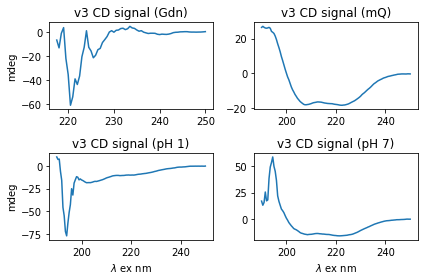

In [195]:
plt.subplot(2,2,1)
plt.plot(v3gdnb)
plt.title('v3 CD signal (Gdn)')
plt.ylabel('mdeg')

plt.subplot(2,2,2)
plt.plot(v3mQb)
plt.title('v3 CD signal (mQ)')

plt.subplot(2,2,3)
plt.plot(v3ph1b)
plt.title('v3 CD signal (pH 1)')
plt.xlabel('$\lambda$ ex nm')
plt.ylabel('mdeg')

plt.subplot(2,2,4)
plt.plot(v3ph7b)
plt.title('v3 CD signal (pH 7)')
plt.xlabel('$\lambda$ ex nm')

plt.tight_layout()

These are generated by subtracting the blank from the respective raw data

The given typical CD spectra (Kelly et. al, 2005). Lines are:

Solid line: $\alpha$ helix

Long dashed line: $\beta$ sheet

Dotted line: $\beta$ turn

Short dashed line: Irregular structure

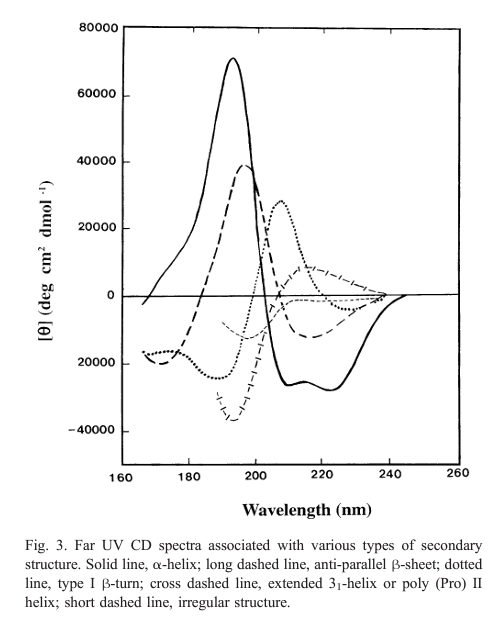

In [226]:
Image("CDspectra_given.png")

#### Raw data and blanks

In [210]:
d1 = {'v3 gdn':v3gdn['mdeg'], 'blank':gdnb['mdeg']}
gdnraw = pd.DataFrame(data=d1)
d2 = {'v3 mQ': v3mQ['mdeg'], 'blank':mQb['mdeg']}
mQraw = pd.DataFrame(data=d2)
d3 = {'v3 pH 1': v3ph1['mdeg'], 'blank':ph1b['mdeg']}
ph1raw = pd.DataFrame(data=d3)
d4 = {'v3 pH 7': v3ph7['mdeg'], 'blank':ph7b['mdeg']}
ph7raw = pd.DataFrame(data=d4)

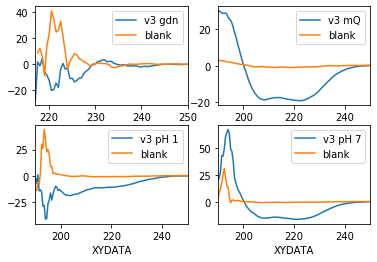

In [219]:
fig, axes = plt.subplots(nrows=2, ncols=2)

gdnraw.plot(ax=axes[0,0])
mQraw.plot(ax=axes[0,1])
ph1raw.plot(ax=axes[1,0])
ph7raw.plot(ax=axes[1,1])

# Week 6: pH effects

#### Data Files

In [77]:
df3 = pd.read_excel('Data/w6/pHData_v3.xlsx',index_col='pH',usecols=1)
df3 = df3.dropna()
df3 = df3.drop(df3[df3.index > 7.5].index) # Removing base denaturation regime
df3 = df3.apply(lambda x: x/x.max(), axis=0) # Normalizing

C:\Users\micha\Anaconda3\lib\site-packages\pandas\io\excel\_base.py:445: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


Text(0.5, 1.0, 'Protein v3 pH Titration')

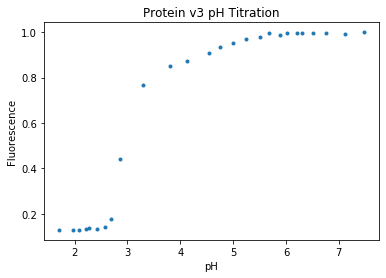

In [78]:
plt.plot(df3,'.')
plt.xlabel('pH')
plt.ylabel('Fluorescence')
plt.title('Protein v3 pH Titration')

#### Curve Fitting

In [79]:
def Karp1(pH, aN, mN, aD, mD, dVh, pHmid):
    fit = (aN + mN*pH + (aD + mD*pH)*10**(dVh*(pHmid-pH)))/(1+10**(dVh*(pHmid-pH)))
    return fit

In [80]:
X = df3.index.values
y = df3['Fluorescence'].values

popt1, pcov = curve_fit(Karp1,X,y,p0=[0.6,0.01,0.1,0,4,3])

Text(0.5, 1.0, 'Karp eq. 1 fit (v3)')

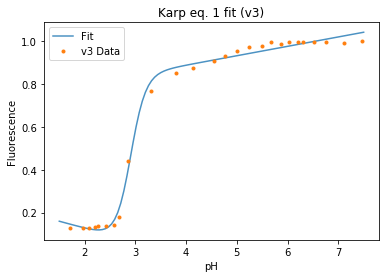

In [81]:
fitX = np.linspace(1.5,7.5,100)
plt.plot(fitX,Karp1(fitX,*popt1),alpha=0.8,label='Fit')
plt.plot(X,y,'.',label='v3 Data')
plt.legend()
plt.xlabel('pH')
plt.ylabel('Fluorescence')
plt.title('Karp eq. 1 fit (v3)')

In [82]:
par_names1 = ['aN','mN','aD','mD','dVh','pHmid']
popt1
for i,_ in enumerate(popt1):
    print('%s : %.3f'%(par_names1[i],popt1[i]))

aN : 0.713
mN : 0.044
aD : 0.256
mD : -0.065
dVh : 2.986
pHmid : 2.899


In [83]:
def Karp2(pH,aN,mN,a1,dv2H,pHmid2,aD,mD,dv1H,pHmid1):
    fit = (aN + mN*pH + a1*10**(dv2H*(pHmid2 - pH)) + (aD + mD*pH)*10**(dv1H*(pHmid1-pH) + dv2H*(pHmid2-pH)))/ \
    (1+10**(dv2H*(pHmid2-pH))+10**(dv1H*(pHmid1-pH)+dv2H*(pHmid2-pH)))
    return fit

In [84]:
popt2,pcov2 = curve_fit(Karp2,X,y,p0=[0.6,0.06,0.5,0.1,4.5,0.15,0,5.5,2.87],maxfev=100000,absolute_sigma=True)

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Fluorescence')

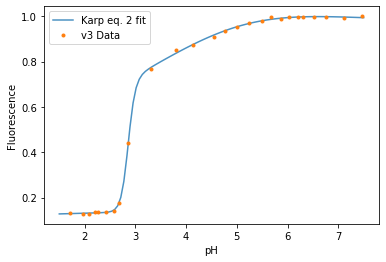

In [87]:
fitX = np.linspace(1.5,7.5,100)
plt.plot(fitX,Karp2(fitX,*popt2),alpha=0.8,label='Karp eq. 2 fit')
plt.plot(X,y,'.',label='v3 Data')
plt.legend()
plt.xlabel('pH')
plt.ylabel('Fluorescence')
#plt.title('Karp eq. 2 fit (v3)')

In [86]:
inits = [0.6,0.06,0.5,0.1,4.5,0.15,0,5.5,2.87]
par_names2 = ['aN','mN','a1','dv2H','pHmid2','aD','mD','dv1H','pHmid1']
for i,_ in enumerate(par_names2):
    print('%s : %.3f'%(par_names2[i],popt2[i]))

aN : 0.361
mN : 0.114
a1 : 0.976
dv2H : -0.436
pHmid2 : 4.963
aD : 0.119
mD : 0.006
dv1H : 6.650
pHmid1 : 2.999


#### Repeating for v4, v5

In [42]:
df4 = pd.read_table('Data/w6/200305-v4-AcidTitr.txt')
df4 = df4.set_index('pH').drop(labels='Trial',axis=1).dropna()
df4 = df4.drop(df4[df4.index>7.0].index)
df4 = df4.apply(lambda x: x/x.max(), axis=0)


Text(0.5, 1.0, 'Protein v4 pH Titration')

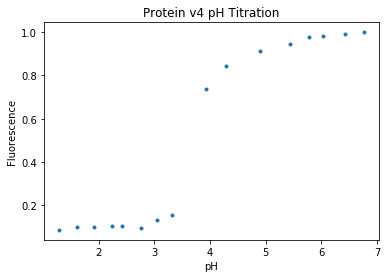

In [44]:
plt.plot(df4,'.')
plt.xlabel('pH')
plt.ylabel('Fluorescence')
plt.title('Protein v4 pH Titration')

In [45]:
popt_v4, pcov_v4 = curve_fit(Karp1,df4.index.values,df4['FL-signal'].values, maxfev=10000, p0=[0.6,0.01,0.1,0,4,3])
for i,_ in enumerate(popt_v4):
    print('%s : %.3f'%(par_names1[i],popt_v4[i]))

aN : 0.639
mN : 0.056
aD : 0.073
mD : 0.013
dVh : 2.999
pHmid : 3.700


Text(0.5, 1.0, 'Karp eq. 1 fit (v4)')

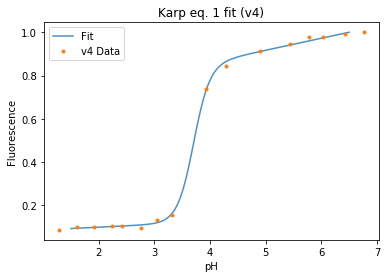

In [46]:
fitX = np.linspace(1.5,6.5,100)
plt.plot(fitX,Karp1(fitX,*popt_v4),alpha=0.8,label='Fit')
plt.plot(df4.index.values,df4['FL-signal'].values,'.',label='v4 Data')
plt.legend()
plt.xlabel('pH')
plt.ylabel('Fluorescence')
plt.title('Karp eq. 1 fit (v4)')

aN : 0.956
mN : 0.007
a1 : 0.724
dv2H : 0.667
pHmid2 : 4.329
aD : 0.068
mD : 0.015
dv1H : 3.211
pHmid1 : 3.712


Text(0.5, 1.0, 'Karp eq. 2 fit (v4)')

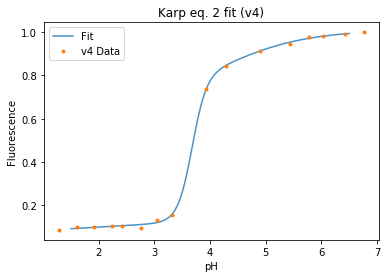

In [56]:
popt_v4_2, pcov_v4_2 = curve_fit(Karp2,df4.index.values,df4['FL-signal'].values, maxfev=10000, p0=[0.6,0.06,0.5,0.1,4.5,0.15,0,5.5,2.87])

for i,_ in enumerate(popt_v4_2):
    print('%s : %.3f'%(par_names2[i],popt_v4_2[i]))
    
fitX = np.linspace(1.5,6.5,100)
plt.plot(fitX,Karp2(fitX,*popt_v4_2),alpha=0.8,label='Fit')
plt.plot(df4.index.values,df4['FL-signal'].values,'.',label='v4 Data')
plt.legend()
plt.xlabel('pH')
plt.ylabel('Fluorescence')
plt.title('Karp eq. 2 fit (v4)')

----------------------

Text(0.5, 1.0, 'Protein v5 pH Titration')

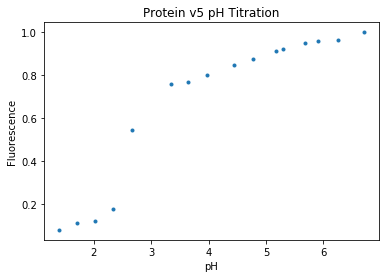

In [48]:
df5 = pd.read_excel('Data/w6/pHData_v5.xlsx',index_col=0)
df5 = df5.drop(df5[df5.index>7].index)
df5 = df5.apply(lambda x: x/x.max(), axis=0)

plt.plot(df5,'.')
plt.xlabel('pH')
plt.ylabel('Fluorescence')
plt.title('Protein v5 pH Titration')

aN : 0.511
mN : 0.075
aD : -0.002
mD : 0.063
dVh : 4.796
pHmid : 2.585


Text(0.5, 1.0, 'Karp eq. 1 fit (v5)')

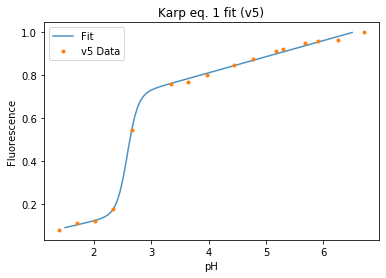

In [51]:
popt_v5, pcov_v5 = curve_fit(Karp1,df5.index.values,df5['Fluorescence'].values, maxfev=10000, p0=[0.6,0.01,0.1,0,4,3])

for i,_ in enumerate(popt_v5):
    print('%s : %.3f'%(par_names1[i],popt_v5[i]))
    
fitX = np.linspace(1.5,6.5,100)
plt.plot(fitX,Karp1(fitX,*popt_v5),alpha=0.8,label='Fit')
plt.plot(df5.index.values,df5['Fluorescence'].values,'.',label='v5 Data')
plt.legend()
plt.xlabel('pH')
plt.ylabel('Fluorescence')
plt.title('Karp eq. 1 fit (v5)')

aN : 0.688
mN : 0.046
a1 : 0.746
dv2H : 1.018
pHmid2 : 4.101
aD : -0.002
mD : 0.063
dv1H : 4.651
pHmid1 : 2.605


C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Karp eq. 2 fit (v5)')

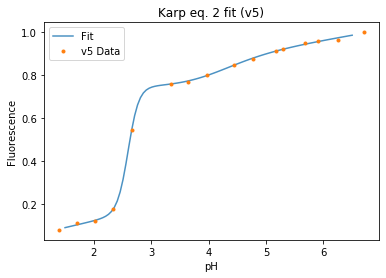

In [54]:
popt_v5_2, pcov_v5_2 = curve_fit(Karp2,df5.index.values,df5['Fluorescence'].values, maxfev=10000, p0=[0.6,0.06,0.5,0.1,4.5,0.15,0,5.5,2.87])

for i,_ in enumerate(popt_v5_2):
    print('%s : %.3f'%(par_names2[i],popt_v5_2[i]))
    
fitX = np.linspace(1.5,6.5,100)
plt.plot(fitX,Karp2(fitX,*popt_v5_2),alpha=0.8,label='Fit')
plt.plot(df5.index.values,df5['Fluorescence'].values,'.',label='v5 Data')
plt.legend()
plt.xlabel('pH')
plt.ylabel('Fluorescence')
plt.title('Karp eq. 2 fit (v5)')

These fit parameters for v4 and v5 were checked and validated with their respective experimentalist

# Week 7: $\Delta$G

#### Data Files

In [3]:
dfdg = pd.read_excel('Data/w7/MBL-Sp20-Gdn-Students.xlsx', sheet_name='103D')

In [4]:
dfdg = dfdg.drop(['[GdnHCl].1','[GdnHCl].2','[GdnHCl].3','Unnamed: 5'], axis=1).set_index('[GdnHCl]')


Text(0, 0.5, 'Normalized Fl signal')

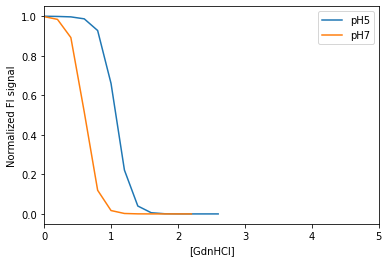

In [5]:
dfdg.plot()
plt.ylabel('Normalized Fl signal')

In [6]:
dg5 = dfdg['pH5'].dropna()
dg7 = dfdg['pH7'].dropna()

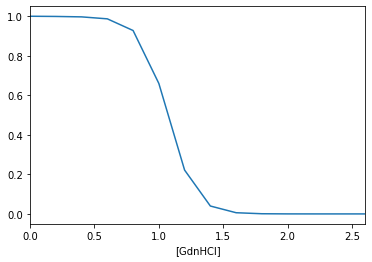

In [7]:
dg5.plot()

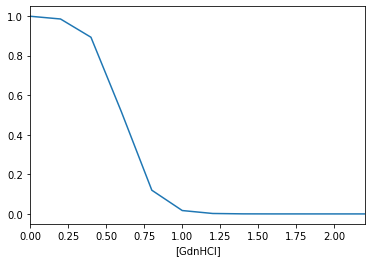

In [8]:
dg7.plot()

#### Finding $\Delta$G for pH=5 and pH = 7

$\Delta G = \Delta G^o + RT\ln K_{eq}$

$ K_{eq} = \frac{[U]}{[N]} =   \frac{f_U}{f_F}  = \frac{(y_F-y)}{(y-y_U)}$

$y_F = 1,   y_U = 0 $ ?

In [9]:
def dGfit(y):
    keq = (1-y)/y
    dg = -1.987e-3*298*np.log(keq)
    return dg

In [10]:
dg7_2 = dGfit(dg7)
dg5_2 = dGfit(dg5).dropna()

C:\Users\micha\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
def lin_fit(x, m, b):
    return m*x + b
popt7, _ = curve_fit(lin_fit, xdata=dg7_2.index, ydata=dg7_2.values)

Text(0.5, 1.0, 'pH=7')

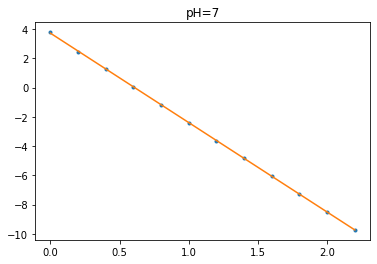

In [12]:
plt.plot(dg7_2, '.')
plt.plot(np.linspace(0,2.2,20), lin_fit(np.linspace(0,2.2,20),*popt7))
plt.title('pH=7')

In [13]:
popt5, _ = curve_fit(lin_fit, xdata=dg5_2.index, ydata=dg5_2.values)

Text(0.5, 1.0, 'pH=5')

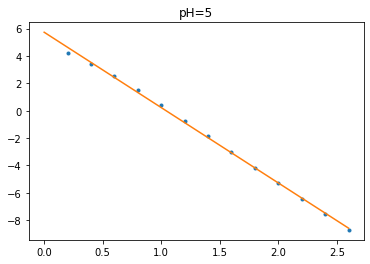

In [14]:
plt.plot(dg5_2, '.')
plt.plot(np.linspace(0,2.6,20), lin_fit(np.linspace(0,2.6,20),*popt5))
plt.title('pH=5')

In [15]:
print('Delta G for L103D at pH=7: %.3f kcal'%lin_fit(0,*popt7))
print('Delta G for L103D at pH=5: %.3f kcal'%lin_fit(0,*popt5))

Delta G for L103D at pH=7: 3.714 kcal
Delta G for L103D at pH=5: 5.736 kcal


In [42]:
df_pl = pd.read_excel('Gdn_prelab.xlsx', index_col=1)
df_pl = df_pl.drop('n', axis=1)

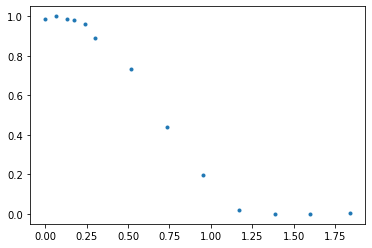

In [43]:
plt.plot(df_pl, '.')

In [44]:
#df_pl = df_pl.drop([0.00, 0.065, 0.130, 0.173, 0.238, 1.168, 1.385, 1.601, 1.839])
df_pl

,y
x,
0.000,0.985
0.065,1.000
0.130,0.987
0.173,0.979
0.238,0.962
0.303,0.889
0.519,0.733
0.736,0.440
0.952,0.198


In [45]:
pl_k = dGfit(df_pl).dropna()

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
pl_k = pl_k.drop([0.065, 1.385])
pl_k

,y
x,
0.000,2.477805
0.130,2.563740
0.173,2.274954
0.238,1.913413
0.303,1.231958
0.519,0.597986
0.736,-0.142798
0.952,-0.828290
1.168,-2.368042


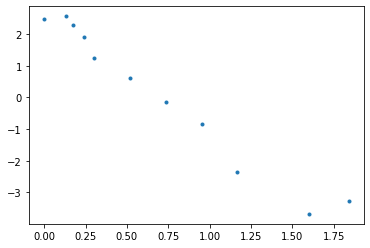

In [49]:
plt.plot(pl_k, '.')

In [50]:
def lin_fit(x, m, b):
    return m*x + b
popt_pl, _ = curve_fit(lin_fit, xdata=pl_k.index, ydata=pl_k.values.flatten())

In [39]:
pl_k.values.flatten()

array([ 1.23195784,  0.5979863 , -0.14279832, -0.82829047])

In [40]:
dg5_2.values

array([ 4.21299173,  3.4410447 ,  2.56662306,  1.51356073,  0.39300231,
       -0.74321756, -1.88247361, -3.02227718, -4.16217598, -5.3020912 ,
       -6.4420095 , -7.58192863, -8.72184825])

In [51]:
print('Delta G for prelab protein: %.3f kcal'%lin_fit(0,*popt_pl))

Delta G for prelab protein: 2.618 kcal
